## Trial 6
### No window shifting approach
#### Inputs: strain, initial T, const. strain rate
#### Outputs: stress, delT

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

## Read data file and some glimpse on raw data

In [2]:
filename = "data_delT.csv"
df = pd.read_csv(filename, header=0, sep=',', dtype=np.float64)
print('Are ther any Nan value?:\n', np.isnan(df).any())
# ignore rows which contain zero
# ignore rows which have negative instantaneous rate
ignore_zero = df[(df['Strain']==0) | (df['Stress']==0) | (df['Temp']==0) | (df['Rate']<=0) | (df['I_Temp']==0)]
df=pd.concat([df, ignore_zero, ignore_zero]).drop_duplicates(keep=False)
df=pd.concat([df, ignore_zero, ignore_zero]).drop_duplicates(keep=False)
df.head()

Are ther any Nan value?:
 Strain    False
Stress    False
delT      False
Rate      False
I_Temp    False
Temp      False
dtype: bool


,Strain,Stress,delT,Rate,I_Temp,Temp
0,0.0004,230.616121,0.0,0.000278,293.0,293.0
1,0.0005,233.817714,0.0,0.000278,293.0,293.0
2,0.0006,236.126706,0.0,0.000278,293.0,293.0
3,0.0007,237.659430,0.0,0.000278,293.0,293.0
4,0.0008,239.052686,0.0,0.000278,293.0,293.0


## Splitting flow curves

In [3]:
# Flow curve in normal environment; room temperature/quasi-static loading
df_QSRT = df[(df['Temp']==293.0) & (df['Rate']==0.000278)]
df_QSRT.head()

,Strain,Stress,delT,Rate,I_Temp,Temp
0,0.0004,230.616121,0.0,0.000278,293.0,293.0
1,0.0005,233.817714,0.0,0.000278,293.0,293.0
2,0.0006,236.126706,0.0,0.000278,293.0,293.0
3,0.0007,237.659430,0.0,0.000278,293.0,293.0
4,0.0008,239.052686,0.0,0.000278,293.0,293.0


In [4]:
# Flow curve in different temperatures
df_QSRT = df[(df['Temp']==293.0) & (df['Rate']==0.000278)]
df_373K = df[(df['Temp']==373.0) & (df['Rate']==0.000278)]
df_473K = df[(df['Temp']==473.0) & (df['Rate']==0.000278)]
df_573K = df[(df['Temp']==573.0) & (df['Rate']==0.000278)]
df_673K = df[(df['Temp']==673.0) & (df['Rate']==0.000278)]

In [5]:
# Flow curves in different strain rates, adiabatic condition
df_e4 = df[(df['Rate']==0.0001) & (df['I_Temp']==293.0)]
df_QSRT = df[(df['Rate']==0.000278) & (df['Temp']==293.0)]
df_e3 = df[(df['Rate']==0.001) & (df['I_Temp']==293.0)]
df_e2 = df[(df['Rate']==0.01) & (df['Temp']!=293.0) & (df['Temp']!=373.001) & (df['Temp']!=373.0) & (df['I_Temp']==293)]
df_e1 = df[(df['Rate']==0.1) & (df['Temp']!=293.0) & (df['I_Temp']==293)]

In [6]:
# Flow curve in isothermal conditions
df_e3_iso = df[(df['Rate']==0.001) & (df['Temp']==293.0) & (df['Strain']>=0.002)]
df_e2_iso = df[(df['Rate']==0.01) & (df['Temp']==293.0) & (df['Strain']>=0.002)]
df_e1_iso = df[(df['Rate']==0.1) & (df['Temp']==293.0) & (df['Strain']>=0.002)]
df_e2_373K_iso = df[(df['Rate']==0.01) & (df['Temp']==373.0)]
# Flow curve in isothermal conditions
df_e2_373K = df[(df['Rate']==0.01) & (df['Temp']==373.001)]

In [7]:
# Flow curves in 0.01 strain rate, adiabatic condition
df_e2_RT = df[(df['Rate']==0.01) & (df['I_Temp']==293.0)]
df_e2_373K = df[(df['Rate']==0.01) & (df['I_Temp']==373.0)]
df_e2_473K = df[(df['Rate']==0.01) & (df['I_Temp']==473.0)]
df_e2_573K = df[(df['Rate']==0.01) & (df['I_Temp']==573.0)]
df_e2_673K = df[(df['Rate']==0.01) & (df['I_Temp']==673.0)]

In [8]:
# Flow curves in 0.1 strain rate, adiabatic condition
df_e1_RT = df[(df['Rate']==0.1) & (df['I_Temp']==293.0)]
df_e1_373K = df[(df['Rate']==0.1) & (df['I_Temp']==373.0)]
df_e1_473K = df[(df['Rate']==0.1) & (df['I_Temp']==473.0)]
df_e1_573K = df[(df['Rate']==0.1) & (df['I_Temp']==573.0)]
df_e1_673K = df[(df['Rate']==0.1) & (df['I_Temp']==673.0)]

In [9]:
# Flow curves in 0.001 strain rate, adiabatic condition
df_e3_RT = df[(df['Rate']==0.001) & (df['I_Temp']==293.0)]
df_e3_373K = df[(df['Rate']==0.001) & (df['I_Temp']==373.0)]
df_e3_473K = df[(df['Rate']==0.001) & (df['I_Temp']==473.0)]
df_e3_573K = df[(df['Rate']==0.001) & (df['I_Temp']==573.0)]
df_e3_673K = df[(df['Rate']==0.001) & (df['I_Temp']==673.0)]

In [10]:
# Flow curves in 0.0001 strain rate, adiabatic condition
df_e4_RT = df[(df['Rate']==0.0001) & (df['I_Temp']==293.0)]
df_e4_373K = df[(df['Rate']==0.0001) & (df['I_Temp']==373.0)]
df_e4_473K = df[(df['Rate']==0.0001) & (df['I_Temp']==473.0)]
df_e4_573K = df[(df['Rate']==0.0001) & (df['I_Temp']==573.0)]
df_e4_673K = df[(df['Rate']==0.0001) & (df['I_Temp']==673.0)]

In [11]:
# Put all flow curves as list
flows = {'e4': df_e4,
         'e4_373K': df_e4_373K,
         'e4_473K': df_e4_473K,
         'e4_573K': df_e4_573K,
         'e4_673K': df_e4_673K,
         'QSRT': df_QSRT,
         '373K': df_373K, 
         '473K': df_473K,
         '573K': df_573K,
         '673K': df_673K,
         'e3': df_e3,
         'e3_373K': df_e3_373K,
         'e3_473K': df_e3_473K,
         'e3_573K': df_e3_573K,
         'e3_673K': df_e3_673K,
         'e2': df_e2,
         'e2_373K': df_e2_373K,
         'e2_473K': df_e2_473K,
         'e2_573K': df_e2_573K,
         'e2_673K': df_e2_673K,
         'e1': df_e1,
         'e1_373K': df_e1_373K,
         'e1_473K': df_e1_473K,
         'e1_573K': df_e1_573K,
         'e1_673K': df_e1_673K
        }

In [12]:
beta_flows = {'e4': df_e4, 'QSRT': df_QSRT, 'e3': df_e3, 'e2': df_e2, 'e1': df_e1}
beta_flows1 = {'e4_373K': df_e4_373K, '373K': df_373K, 'e3_373K': df_e3_373K, 'e2_373K': df_e2_373K, 'e1_373K': df_e1_373K}
beta_flows2 = {'e4_473K': df_e4_473K, '473K': df_473K, 'e3_473K': df_e3_473K, 'e2_473K': df_e2_473K, 'e1_473K': df_e1_473K}
beta_flows3 = {'e4_573K': df_e4_573K, '573K': df_573K, 'e3_573K': df_e3_573K, 'e2_573K': df_e2_573K, 'e1_573K': df_e1_573K}
beta_flows4 = {'e4_673K': df_e4_673K, '673K': df_673K, 'e3_673K': df_e3_673K, 'e2_673K': df_e2_673K, 'e1_673K': df_e1_673K}

## Plot all the flow curves

(100.0, 550.0)

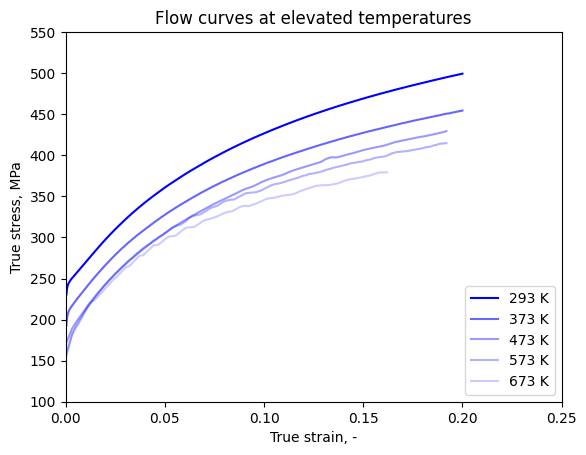

In [13]:
# QSRT

plt.plot(df_QSRT['Strain'], df_QSRT['Stress'], label='293 K', color='blue', alpha=1.0)
plt.plot(df_373K['Strain'], df_373K['Stress'], label='373 K', color='blue', alpha=0.6)
plt.plot(df_473K['Strain'], df_473K['Stress'], label='473 K', color='blue', alpha=0.4)
plt.plot(df_573K['Strain'], df_573K['Stress'], label='573 K', color='blue', alpha=0.3)
plt.plot(df_673K['Strain'], df_673K['Stress'], label='673 K', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at elevated temperatures')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

(100.0, 550.0)

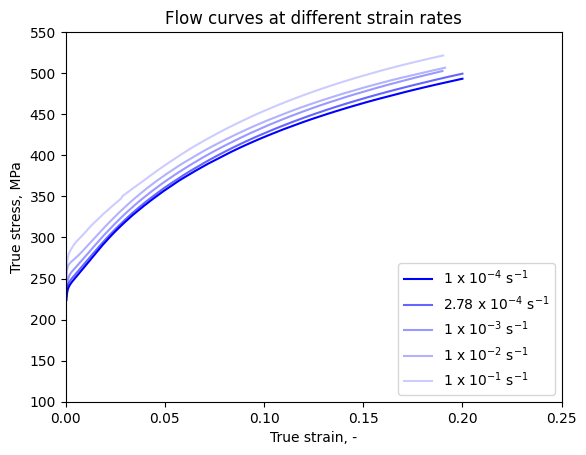

In [14]:
# Different strain rates

plt.plot(df_e4_RT['Strain'], df_e4_RT['Stress'], label='1 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=1.0)
plt.plot(df_QSRT['Strain'], df_QSRT['Stress'], label='2.78 x 10$^{-4}$ s$^{-1}$', color='blue', alpha=0.6)
plt.plot(df_e3_RT['Strain'], df_e3_RT['Stress'], label='1 x 10$^{-3}$ s$^{-1}$', color='blue', alpha=0.4)
plt.plot(df_e2_RT['Strain'], df_e2_RT['Stress'], label='1 x 10$^{-2}$ s$^{-1}$', color='blue', alpha=0.3)
plt.plot(df_e1_RT['Strain'], df_e1_RT['Stress'], label='1 x 10$^{-1}$ s$^{-1}$', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at different strain rates')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

(100.0, 550.0)

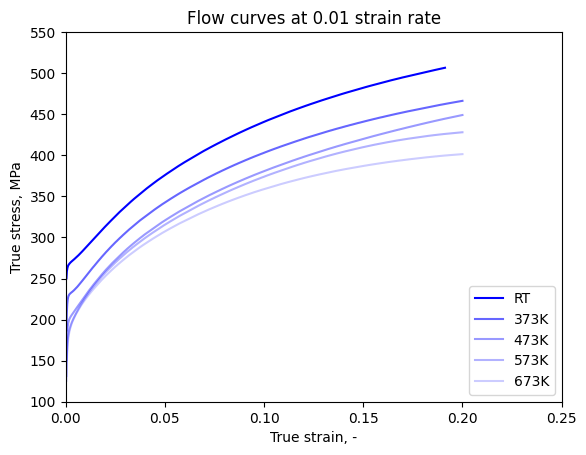

In [15]:
# 0.01 strain rate, all temperatures

plt.plot(df_e2_RT['Strain'], df_e2_RT['Stress'], label='RT', color='blue', alpha=1.0)
plt.plot(df_e2_373K['Strain'], df_e2_373K['Stress'], label='373K', color='blue', alpha=0.6)
plt.plot(df_e2_473K['Strain'], df_e2_473K['Stress'], label='473K', color='blue', alpha=0.4)
plt.plot(df_e2_573K['Strain'], df_e2_573K['Stress'], label='573K', color='blue', alpha=0.3)
plt.plot(df_e2_673K['Strain'], df_e2_673K['Stress'], label='673K', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at 0.01 strain rate')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

(100.0, 550.0)

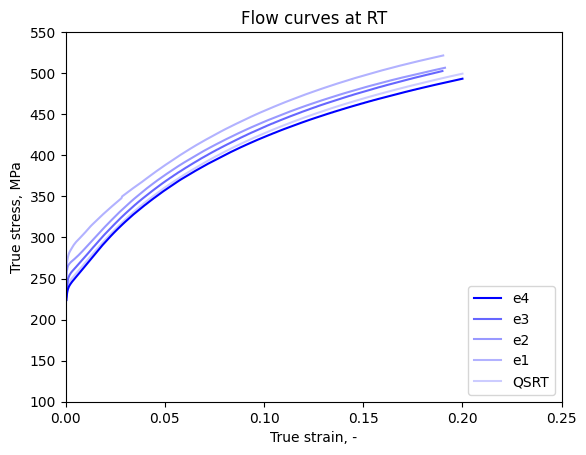

In [16]:
# RT all strain rates

plt.plot(df_e4_RT['Strain'], df_e4_RT['Stress'], label='e4', color='blue', alpha=1.0)
plt.plot(df_e3_RT['Strain'], df_e3_RT['Stress'], label='e3', color='blue', alpha=0.6)
plt.plot(df_e2_RT['Strain'], df_e2_RT['Stress'], label='e2', color='blue', alpha=0.4)
plt.plot(df_e1_RT['Strain'], df_e1_RT['Stress'], label='e1', color='blue', alpha=0.3)
plt.plot(df_QSRT['Strain'], df_QSRT['Stress'], label='QSRT', color='blue', alpha=0.2)

plt.xlabel('True strain, -')    #Name x label
plt.ylabel('True stress, MPa')    #Name y label
plt.title('Flow curves at RT')    #Title name
plt.legend(loc=4)
plt.xlim(xmin=0, xmax=0.25) # x-axis range
#plt.xticks(np.linspace(0,0.2,5)) # x-axis range
plt.ylim(ymin=100, ymax=550) # y-axis range

## Preprocessing

In [17]:
# apply decadic log
flows_log = {}
for key, fc in flows.items():
    fc = fc.reset_index(drop=True)
    # apply decadic log to strain rates
    log_rate = pd.DataFrame(np.log10(fc['Rate'].values))
    log_rate.columns = ['log_rate']
    # apply decadic log to strain
    log_strain = pd.DataFrame(np.log10(fc['Strain'].values))
    log_strain.columns = ['log_strain']
    
    fc_log = pd.concat([fc, log_strain, log_rate], axis=1)
    fc_log = fc_log.drop(columns=['Strain', 'Rate'])
    cols = ['log_strain', 'log_rate', 'I_Temp', 'Temp', 'Stress', 'delT']
    fc_log = fc_log[cols]
    flows_log[key] = fc_log
raw_features = len(flows_log['QSRT'].columns.values)
flows_log['QSRT'].columns.values

array(['log_strain', 'log_rate', 'I_Temp', 'Temp', 'Stress', 'delT'],
      dtype=object)

In [2]:
import numpy as np
stress_range = np.array([40, 570])
temp_range = np.array([290, 700])
#log_temp_range = [np.log10(290), np.log10(700)]
log_strain_range = [np.log10(0.25), np.log10(1e-9)] # valid only if strain < 1.0
log_rate_range = [np.log10(0.1), np.log10(0.0001)] # valid only if rate < 1.0
delT_range = np.array([0, 12.2])

print('stress range: ', stress_range)
print('temp range: ', temp_range)
print('log strain range: ', log_strain_range)
print('log rate range: ', log_rate_range)
print('delT range: ', delT_range)

stress range:  [ 40 570]
temp range:  [290 700]
log strain range:  [-0.6020599913279624, -9.0]
log rate range:  [-1.0, -4.0]
delT range:  [ 0.  12.2]


In [18]:
# apply scaling
flows_scaled = {}
stress_range = np.array([40, 570])
temp_range = np.array([290, 700])
#log_temp_range = [np.log10(290), np.log10(700)]
log_strain_range = [np.log10(0.25), np.log10(1e-9)] # valid only if strain < 1.0
log_rate_range = [np.log10(0.1), np.log10(0.0001)] # valid only if rate < 1.0
delT_range = np.array([0, 12.2])

def manual_scaling(feat, range_value):
    return (feat - range_value[0])/range_value[1]
def manual_descaling(feat, range_value): # inverse of the function above
    return feat * range_value[1] + range_value[0]

for key, fc in flows_log.items():
    fc['Stress'] = manual_scaling(fc['Stress'], stress_range)
    fc['Temp'] = manual_scaling(fc['Temp'], temp_range)
    fc['I_Temp'] = manual_scaling(fc['I_Temp'], temp_range)
    fc['log_strain'] = manual_scaling(fc['log_strain'], log_strain_range)
    fc['log_rate'] = manual_scaling(fc['log_rate'], log_rate_range)
    fc['delT'] = manual_scaling(fc['delT'], delT_range)
    flows_scaled[key] = fc
flows_scaled['373K'].head()

,log_strain,log_rate,I_Temp,Temp,Stress,delT
0,0.310653,0.638989,0.118571,0.118571,0.268126,0.0
1,0.299886,0.638989,0.118571,0.118571,0.275041,0.0
2,0.291088,0.638989,0.118571,0.118571,0.279938,0.0
3,0.283649,0.638989,0.118571,0.118571,0.283179,0.0
4,0.277206,0.638989,0.118571,0.118571,0.286332,0.0


## Decompose train and test set

In [19]:
train_set_name = ['e4_473K', 'QSRT', '673K', 'e3_373K', 'e3_573K', 'e2', 'e2_473K', 'e1_473K', 'e1_673K']
test_set_name = ['e4', 'e4_373K', 'e4_573K', 'e4_673K', '373K', '473K', '573K', 'e3', 'e3_473K', 'e3_673K',
                 'e2_373K', 'e2_573K', 'e2_673K', 'e1', 'e1_373K', 'e1_573K']
val_set_name = ['e4_373K', 'e4_473K', 'e4_573K', 'e4_673K', 'e3_373K', 'e3_473K', 'e3_573K', 'e3_673K']



train_set = []
test_set = []
val_set = []
exp_no_T = []

for key, fc in flows_scaled.items():
    if key in train_set_name:
        train_set.append(fc)
    if key in test_set_name:
        test_set.append(fc)
    if key in val_set_name:
        val_set.append(fc)
    else:
        exp_no_T.append(fc)
df_train = pd.concat(train_set)
df_test = pd.concat(test_set)
df_val = pd.concat(val_set)

In [20]:
flows_scaled.keys()

dict_keys(['e4', 'e4_373K', 'e4_473K', 'e4_573K', 'e4_673K', 'QSRT', '373K', '473K', '573K', '673K', 'e3', 'e3_373K', 'e3_473K', 'e3_573K', 'e3_673K', 'e2', 'e2_373K', 'e2_473K', 'e2_573K', 'e2_673K', 'e1', 'e1_373K', 'e1_473K', 'e1_573K', 'e1_673K'])

## Decompose label and feature

In [21]:
lbl_name = ['Stress', 'delT']

#ignore_cols = ['Stress(t-'+str(w)+')', 'Temp(t-'+str(w)+')' if (w>0) else '' for w in range(1, windows+1)]
ignore_cols = ['Temp']
# including stress and temp into training yield too good result. Let's ignore it somehow.    
# ignore_cols = []

def decomp_label_feat(df, lbl_col, ignore_cols=[]):
    label = pd.DataFrame(df[lbl_col])
    ignore_cols.append(lbl_col[0])
    ignore_cols.append(lbl_col[1])
    feat = df.drop(columns=ignore_cols)
    return feat.values, label.values

def restore_strain(log_strain_col, range_value):
    log_strain = manual_descaling(log_strain_col, log_strain_range)
    return 10**log_strain

print('Original columns: \n\n',cols,'\n')
print('Label column...', lbl_name, '\n')
print('Ignore columns...', ignore_cols, '\n')


X_train, y_train = decomp_label_feat(df_train, lbl_name, ignore_cols)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_test = {}
y_test = {}
for ii, df_test in enumerate(test_set):
    X_test[test_set_name[ii]], y_test[test_set_name[ii]] = decomp_label_feat(df_test, lbl_name, ignore_cols)
    print('X_test shape for set ' + test_set_name[ii], X_test[test_set_name[ii]].shape)
    print('y_test shape for set ' + test_set_name[ii], y_test[test_set_name[ii]].shape)

X_train_dict = {}
y_train_dict = {}
for jj, df_train in enumerate(train_set):
    X_train_dict[train_set_name[jj]], y_train_dict[train_set_name[jj]] = decomp_label_feat(df_train, lbl_name, ignore_cols)
    print('X_train shape for set ' + train_set_name[jj], X_train_dict[train_set_name[jj]].shape)
    print('y_train shape for set ' + train_set_name[jj], y_train_dict[train_set_name[jj]].shape)

Original columns: 

 ['log_strain', 'log_rate', 'I_Temp', 'Temp', 'Stress', 'delT'] 

Label column... ['Stress', 'delT'] 

Ignore columns... ['Temp'] 

X_train shape: (17504, 3)
y_train shape: (17504, 2)
X_test shape for set e4 (1997, 3)
y_test shape for set e4 (1997, 2)
X_test shape for set e4_373K (1997, 3)
y_test shape for set e4_373K (1997, 2)
X_test shape for set e4_573K (1997, 3)
y_test shape for set e4_573K (1997, 2)
X_test shape for set e4_673K (1997, 3)
y_test shape for set e4_673K (1997, 2)
X_test shape for set 373K (1997, 3)
y_test shape for set 373K (1997, 2)
X_test shape for set 473K (1916, 3)
y_test shape for set 473K (1916, 2)
X_test shape for set 573K (1916, 3)
y_test shape for set 573K (1916, 2)
X_test shape for set e3 (1896, 3)
y_test shape for set e3 (1896, 2)
X_test shape for set e3_473K (1997, 3)
y_test shape for set e3_473K (1997, 2)
X_test shape for set e3_673K (1997, 3)
y_test shape for set e3_673K (1997, 2)
X_test shape for set e2_373K (1997, 3)
y_test shape fo

In [22]:
X_test_dict = {}
y_test_dict = {}
for jj, df_test in enumerate(test_set):
    X_test_dict[test_set_name[jj]], y_test_dict[test_set_name[jj]] = decomp_label_feat(df_test, lbl_name, ignore_cols)
    print('X_test shape for set ' + test_set_name[jj], X_test_dict[test_set_name[jj]].shape)
    print('y_test shape for set ' + test_set_name[jj], y_test_dict[test_set_name[jj]].shape)

X_test shape for set e4 (1997, 3)
y_test shape for set e4 (1997, 2)
X_test shape for set e4_373K (1997, 3)
y_test shape for set e4_373K (1997, 2)
X_test shape for set e4_573K (1997, 3)
y_test shape for set e4_573K (1997, 2)
X_test shape for set e4_673K (1997, 3)
y_test shape for set e4_673K (1997, 2)
X_test shape for set 373K (1997, 3)
y_test shape for set 373K (1997, 2)
X_test shape for set 473K (1916, 3)
y_test shape for set 473K (1916, 2)
X_test shape for set 573K (1916, 3)
y_test shape for set 573K (1916, 2)
X_test shape for set e3 (1896, 3)
y_test shape for set e3 (1896, 2)
X_test shape for set e3_473K (1997, 3)
y_test shape for set e3_473K (1997, 2)
X_test shape for set e3_673K (1997, 3)
y_test shape for set e3_673K (1997, 2)
X_test shape for set e2_373K (1997, 3)
y_test shape for set e2_373K (1997, 2)
X_test shape for set e2_573K (1997, 3)
y_test shape for set e2_573K (1997, 2)
X_test shape for set e2_673K (1997, 3)
y_test shape for set e2_673K (1997, 2)
X_test shape for set e1 

## Stacked LSTM

In [24]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [25]:
# utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [26]:
def sLSTMmodel(input_shape, nNeurons_1=361, nNeurons_2=361, nNeurons_3=141, out_dim=2):
    model = Sequential()
    model.add(LSTM(nNeurons_1, input_shape=input_shape, activation='relu', return_sequences=True))
    # model.add(Dropout(0.5))
    model.add(LSTM(nNeurons_2, input_shape=input_shape, activation='relu', return_sequences=True))
    # model.add(Dropout(0.5))
    model.add(LSTM(nNeurons_3))
    # model.add(Dropout(0.5))
    model.add(Dense(2))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [27]:
# train
runLSTM = False
np.random.seed(157)
n_iter = 10
param_dist = {'nNeurons_1': range(10, 200, 20),
              'nNeurons_2': range(10, 400, 40),
              'nNeurons_3': range(10, 400, 40)}
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
if runLSTM:
    slstm = KerasRegressor(build_fn=sLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=180, batch_size=170, verbose=0)
    random_search_slstm = RandomizedSearchCV(estimator=slstm, param_distributions=param_dist, scoring='r2')
    start = time.time()
    random_search_slstm.fit(X_train_lstm, y_train)
    elapsed_lstm = (time.time() - start)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % (elapsed_lstm, n_iter))
    report(random_search_slstm.cv_results_)

# RandomizedSearchCV took 11505.21 seconds for 10 candidates parameter settings.

In [28]:
# test
runLSTM = False
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
if runLSTM:
    best_slstm = random_search_slstm.best_estimator_
else:
    best_slstm_param =  {'nNeurons_3': 330, 'nNeurons_2': 290, 'nNeurons_1': 90}
    best_slstm = KerasRegressor(build_fn=sLSTMmodel, input_shape=X_train_lstm.shape[1:], epochs=75, batch_size=64,  verbose=0)
start = time.time()
best_slstm.fit(X_train_lstm, y_train)
elapsed_slstm_test = (time.time() - start)
print('r2_score for training set:', r2_score(y_train, best_slstm.predict(X_train_lstm)))
print("Stack LSTM took %.2f seconds for test." % (elapsed_slstm_test))
slstm_test_pred = {}
for key, X in X_test.items():
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    slstm_test_pred[key] = manual_descaling(best_slstm.predict(X), stress_range)

r2_score for training set: 0.9997340573924833
Stack LSTM took 464.96 seconds for test.


In [29]:
#from keras.models import load_model
#best_slstm = load_model('my_model2.h5')

## Results

### Testing 

In [30]:
slstm_test_pred_stress = {}
slstm_test_pred_temp = {}
for key, X in X_test_dict.items():
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    slstm_test_pred_stress[key] = manual_descaling(best_slstm.predict(X)[:,0], stress_range)
    slstm_test_pred_temp[key] = manual_descaling(best_slstm.predict(X)[:,1], delT_range)

r2_score for e4: 0.9990616903533523
r2_score for e4_373K: 0.9991471168927115
r2_score for e4_573K: 0.9921895873814986
r2_score for e4_673K: 0.9975826329798718
r2_score for 373K: 0.999729858572203
r2_score for 473K: 0.9975927551166777
r2_score for 573K: 0.9960289781851975
r2_score for e3: 0.9988420316167943
r2_score for e3_473K: 0.9925622993474665
r2_score for e3_673K: 0.9827759780257463
r2_score for e2_373K: 0.9966828893620244
r2_score for e2_573K: 0.993933593026331
r2_score for e2_673K: 0.9983629718223577
r2_score for e1: 0.9989472623948896
r2_score for e1_373K: 0.9973303963724034
r2_score for e1_573K: 0.9943297845096705


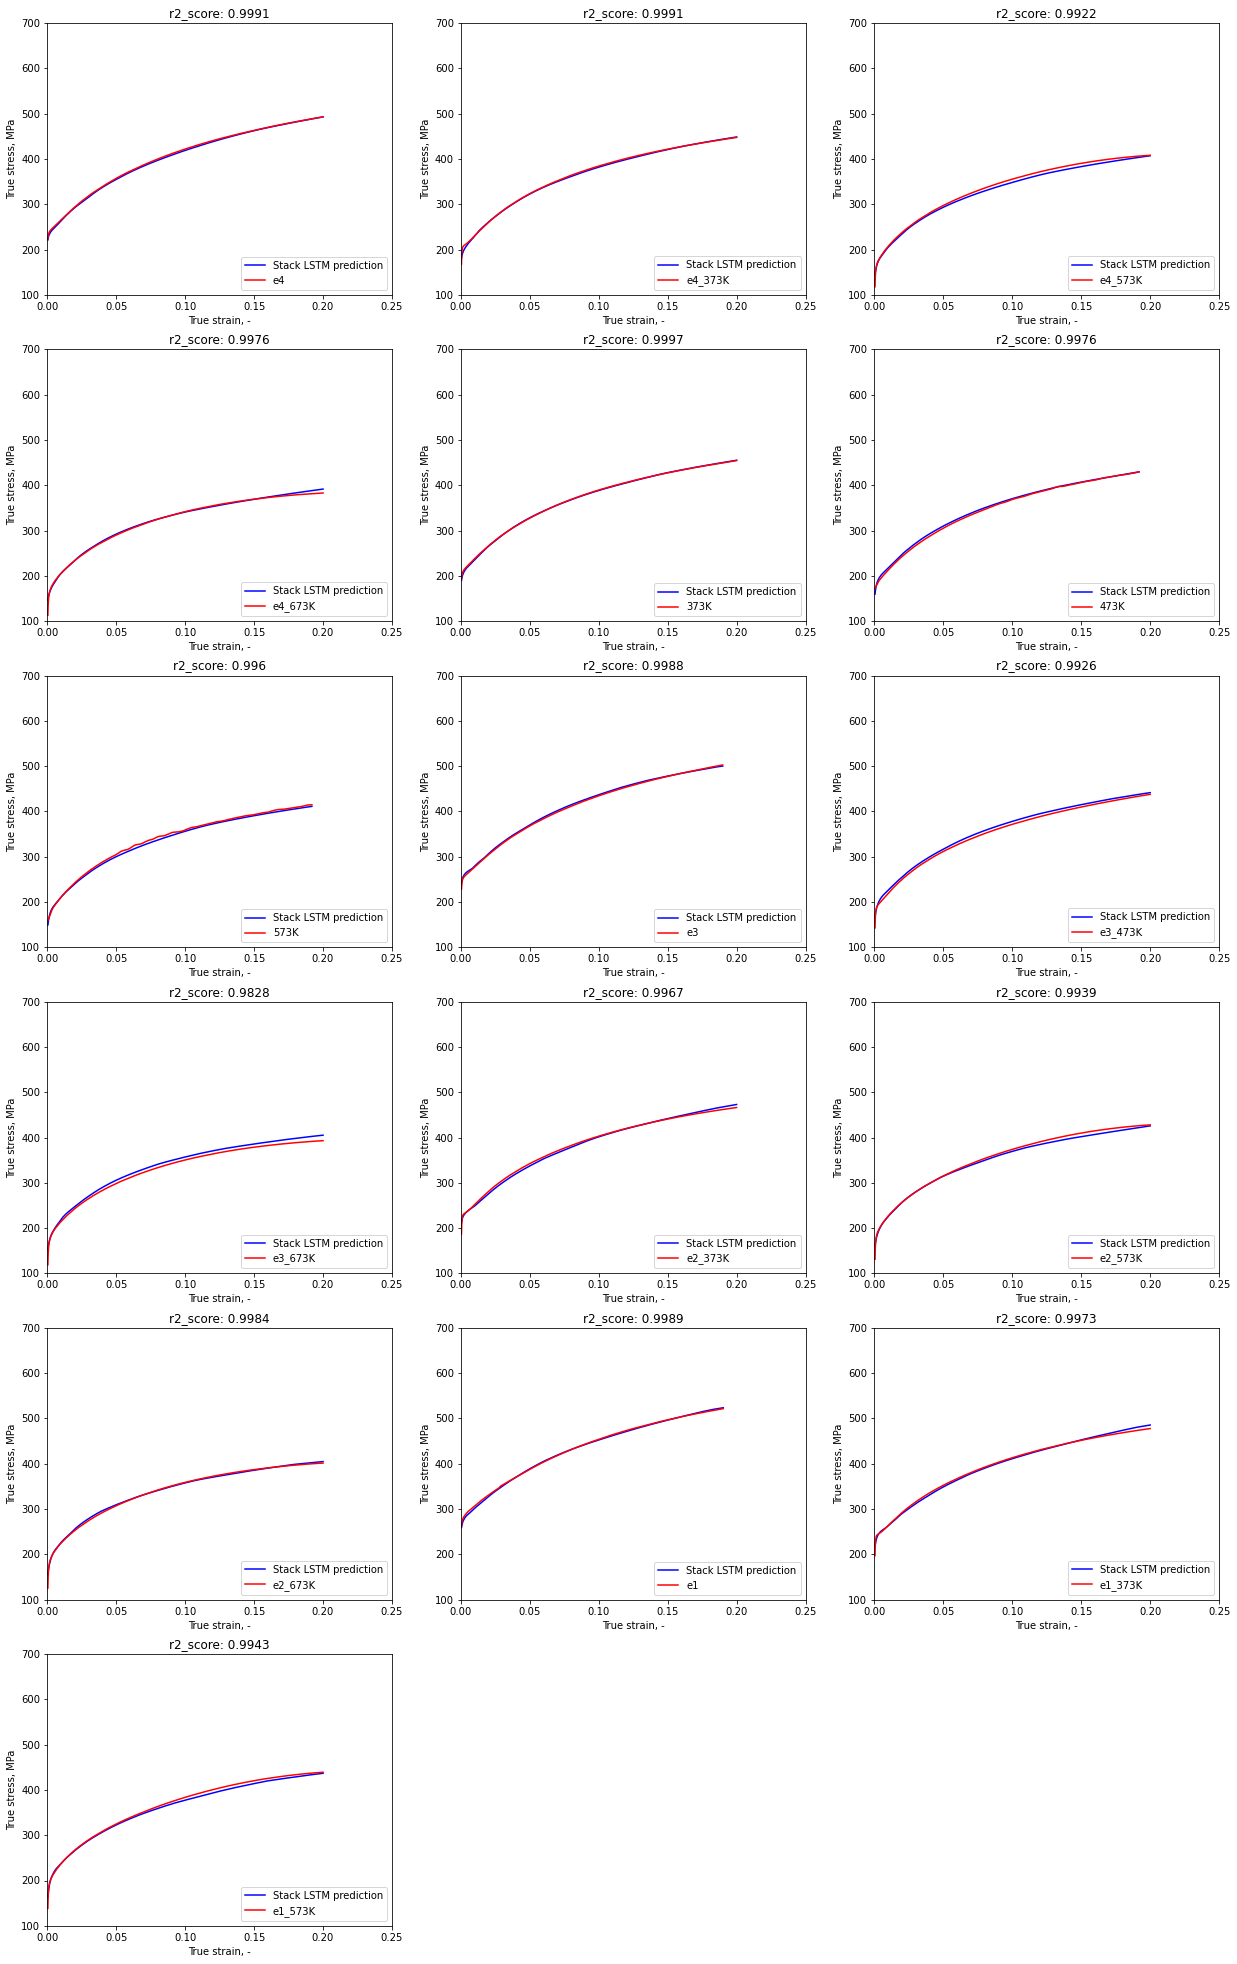

In [31]:
plt.figure(figsize=(21,35))
i=1
for key, X in X_test_dict.items():
    plt.subplot(6,3,i)
    plt.plot(flows[key]['Strain'], slstm_test_pred_stress[key][:,], label='Stack LSTM prediction', color='blue', alpha=1.0)
    plt.plot(flows[key]['Strain'], flows[key]['Stress'], label=key, color='red', alpha=1.0)
    plt.legend(loc=4)
    plt.xlabel('True strain, -')    #Name x label
    plt.ylabel('True stress, MPa')    #Name y label
    plt.xlim(xmin=0, xmax=0.25) # x-axis range
    #plt.xticks(np.linspace(0,0.2,5)) # x-axis range
    plt.ylim(ymin=100, ymax=700) # y-axis range
    plt.title('r2_score: ' + str(round(r2_score(flows[key]['Stress'], slstm_test_pred_stress[key][:,]),4)))
    print('r2_score for ' + key + ':', r2_score(flows[key]['Stress'], slstm_test_pred_stress[key][:,]))
    i=i+1

r2_score for e4: 0.0
r2_score for e4_373K: 0.0
r2_score for e4_573K: 0.0
r2_score for e4_673K: 0.0
r2_score for 373K: 0.0
r2_score for 473K: 0.0
r2_score for 573K: 0.0
r2_score for e3: 0.0
r2_score for e3_473K: 0.0
r2_score for e3_673K: 0.0
r2_score for e2_373K: 0.0
r2_score for e2_573K: 0.0
r2_score for e2_673K: 0.0
r2_score for e1: 0.0
r2_score for e1_373K: 0.0
r2_score for e1_573K: 0.0


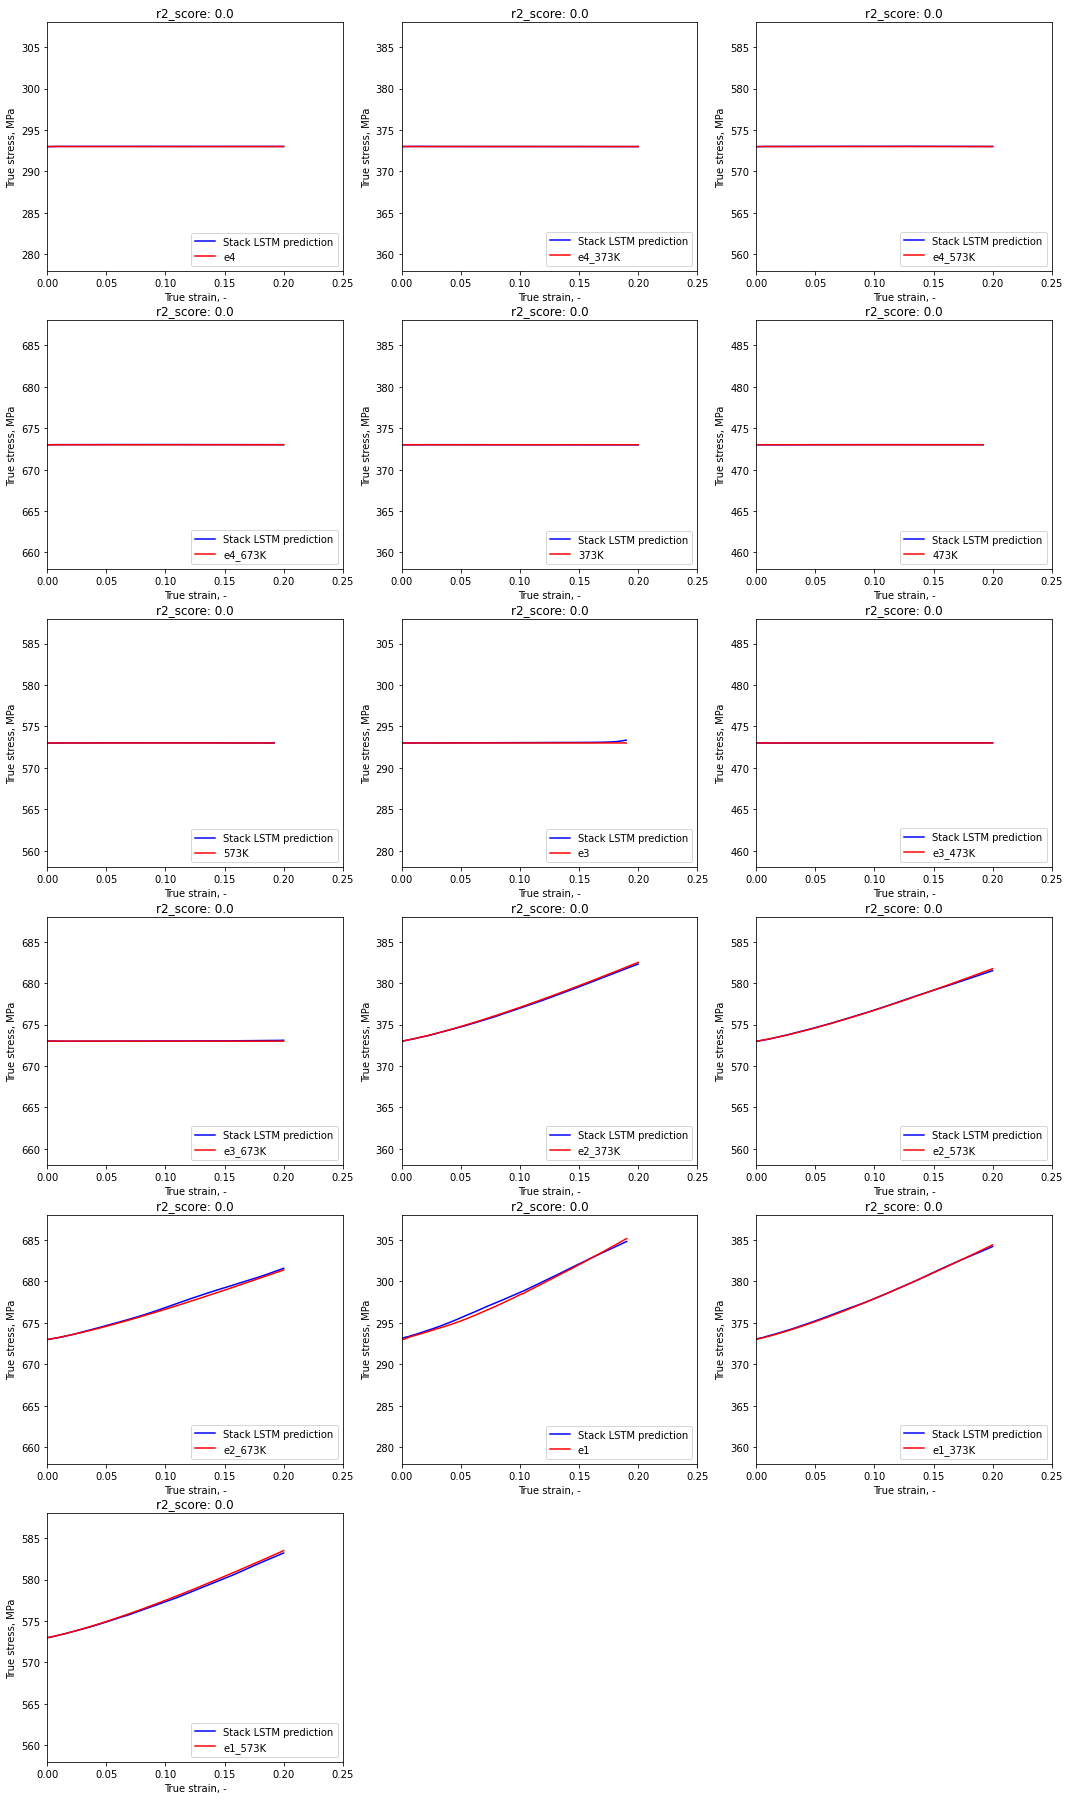

In [32]:
plt.figure(figsize=(18,32))
i=1
for key, X in X_test_dict.items():
    plt.subplot(6,3,i)
    plt.plot(flows[key]['Strain'], slstm_test_pred_temp[key][:,]+flows[key]['I_Temp'], label='Stack LSTM prediction', color='blue', alpha=1.0)
    plt.plot(flows[key]['Strain'], flows[key]['Temp'], label=key, color='red', alpha=1.0)
    plt.legend(loc=4)
    plt.xlabel('True strain, -')    #Name x label
    plt.ylabel('True stress, MPa')    #Name y label
    plt.xlim(xmin=0, xmax=0.25) # x-axis range
    #plt.xticks(np.linspace(0,0.2,5)) # x-axis range
    plt.ylim(ymin=flows[key]['I_Temp'].iloc[1] - 15, ymax=flows[key]['I_Temp'].iloc[1] + 15) # y-axis range
    plt.title('r2_score: ' + str(round(r2_score(flows[key]['I_Temp'], slstm_test_pred_temp[key][:,]),4)))
    print('r2_score for ' + key + ':', r2_score(flows[key]['I_Temp'], slstm_test_pred_temp[key][:,]))
    i=i+1

### Training

In [33]:
slstm_train_pred_stress = {}
slstm_train_pred_temp = {}
for key, X in X_train_dict.items():
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    slstm_train_pred_stress[key] = manual_descaling(best_slstm.predict(X)[:,0], stress_range)
    slstm_train_pred_temp[key] = manual_descaling(best_slstm.predict(X)[:,1], delT_range)

r2_score for e4_473K: 0.9994553582239182
r2_score for QSRT: 0.9996571768764312
r2_score for 673K: 0.9989124066497225
r2_score for e3_373K: 0.9993691890527459
r2_score for e3_573K: 0.9992708424361824
r2_score for e2: 0.9996472567459611
r2_score for e2_473K: 0.9994449969676897
r2_score for e1_473K: 0.9994377240166367
r2_score for e1_673K: 0.9991898670946094


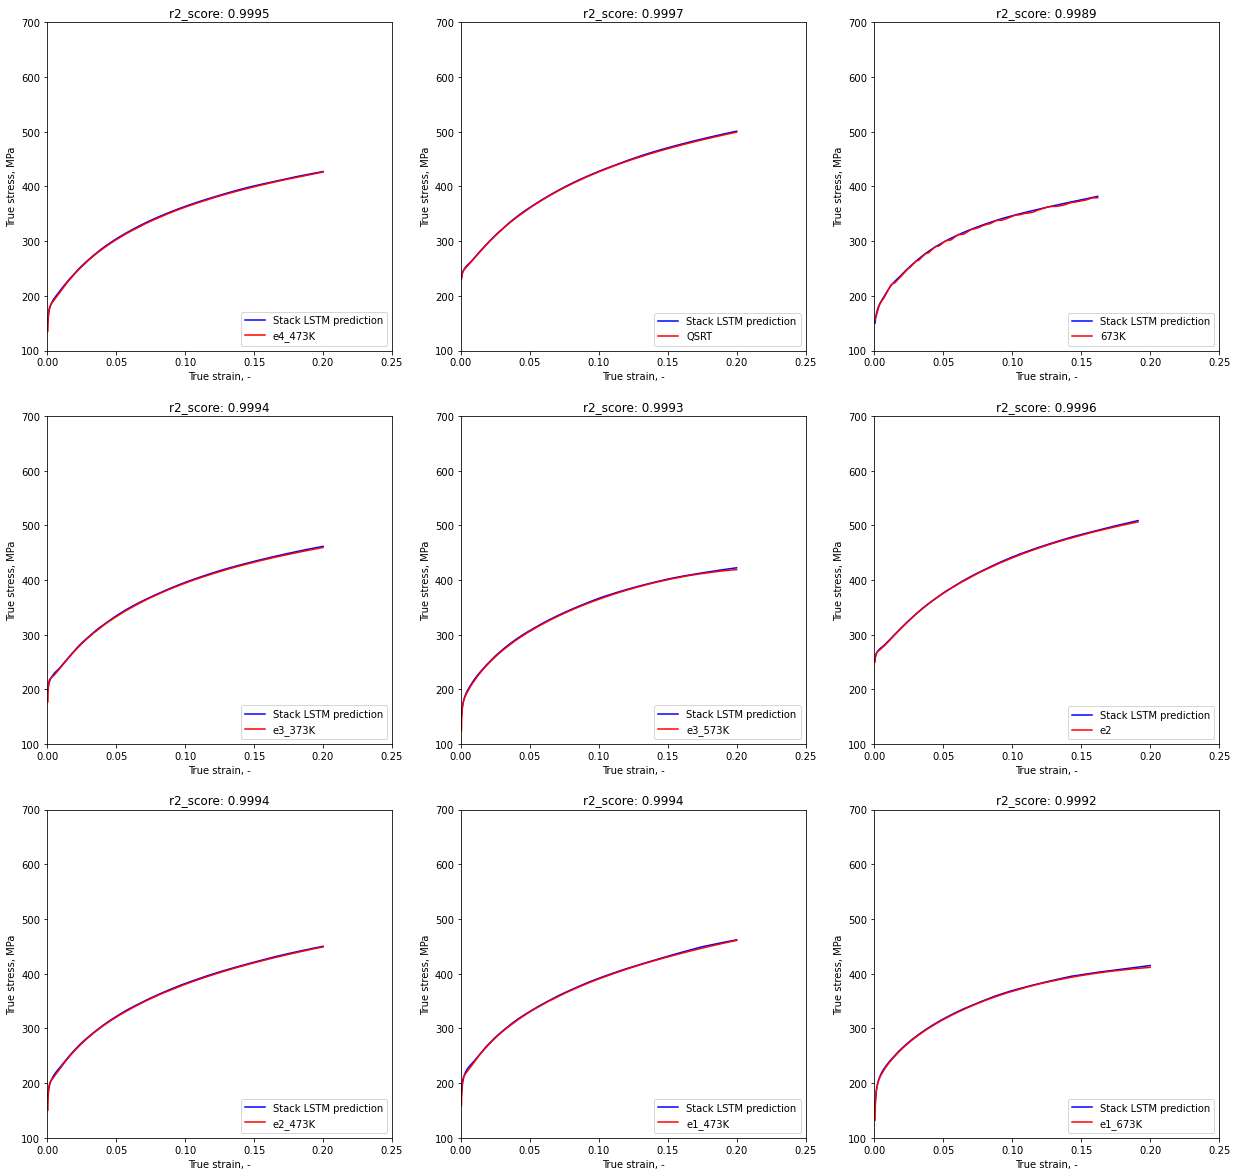

In [34]:
plt.figure(figsize=(21,35))
i=1
for key, X in X_train_dict.items():
    plt.subplot(5,3,i)
    plt.plot(flows[key]['Strain'], slstm_train_pred_stress[key][:,], label='Stack LSTM prediction', color='blue', alpha=1.0)
    plt.plot(flows[key]['Strain'], flows[key]['Stress'], label=key, color='red', alpha=1.0)
    plt.legend(loc=4)
    plt.xlabel('True strain, -')    #Name x label
    plt.ylabel('True stress, MPa')    #Name y label
    plt.xlim(xmin=0, xmax=0.25) # x-axis range
    #plt.xticks(np.linspace(0,0.2,5)) # x-axis range
    plt.ylim(ymin=100, ymax=700) # y-axis range
    plt.title('r2_score: ' + str(round(r2_score(flows[key]['Stress'], slstm_train_pred_stress[key][:,]),4)))
    print('r2_score for ' + key + ':', r2_score(flows[key]['Stress'], slstm_train_pred_stress[key][:,]))
    i=i+1

r2_score for e4_473K: 0.0
r2_score for QSRT: 0.0
r2_score for 673K: 0.0
r2_score for e3_373K: 0.0
r2_score for e3_573K: 0.0
r2_score for e2: 0.0
r2_score for e2_473K: 0.0
r2_score for e1_473K: 0.0
r2_score for e1_673K: 0.0


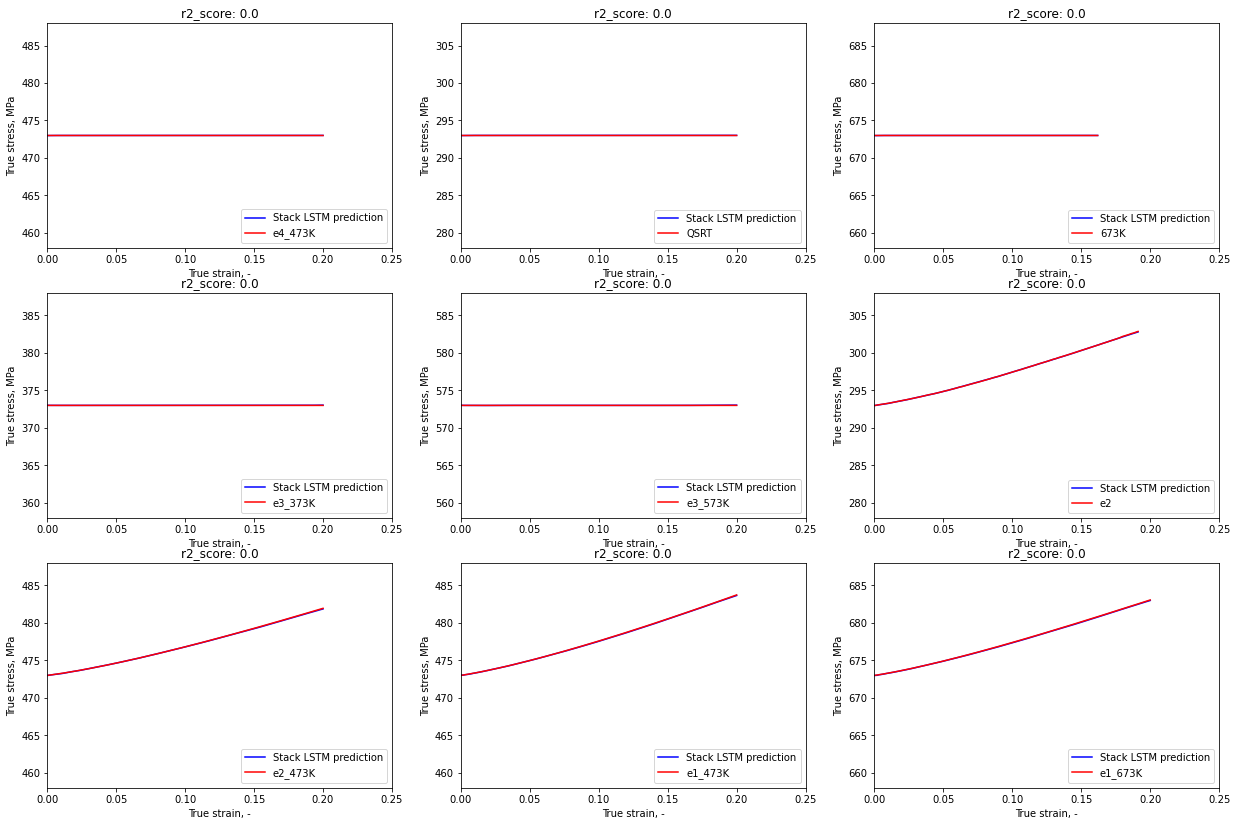

In [35]:
plt.figure(figsize=(21,24))
i=1
for key, X in X_train_dict.items():
    plt.subplot(5,3,i)
    plt.plot(flows[key]['Strain'], slstm_train_pred_temp[key][:,]+flows[key]['I_Temp'], label='Stack LSTM prediction', color='blue', alpha=1.0)
    plt.plot(flows[key]['Strain'], flows[key]['Temp'], label=key, color='red', alpha=1.0)
    plt.legend(loc=4)
    plt.xlabel('True strain, -')    #Name x label
    plt.ylabel('True stress, MPa')    #Name y label
    plt.xlim(xmin=0, xmax=0.25) # x-axis range
    #plt.xticks(np.linspace(0,0.2,5)) # x-axis range
    plt.ylim(ymin=flows[key]['I_Temp'].iloc[1] - 15, ymax=flows[key]['I_Temp'].iloc[1] + 15) # y-axis range
    plt.title('r2_score: ' + str(round(r2_score(flows[key]['I_Temp'], slstm_train_pred_temp[key][:,]),4)))
    print('r2_score for ' + key + ':', r2_score(flows[key]['I_Temp'], slstm_train_pred_temp[key][:,]))
    i=i+1

### Validation

In [36]:
slstm_val_pred_stress = {}
slstm_val_pred_temp = {}
for key, X in X_val_dict.items():
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    slstm_val_pred_stress[key] = manual_descaling(best_slstm.predict(X)[:,0], stress_range)
    slstm_val_pred_temp[key] = manual_descaling(best_slstm.predict(X)[:,1], delT_range)

NameError: name 'X_val_dict' is not defined

In [ ]:
plt.figure(figsize=(21,28))
i=1
for key, X in X_val_dict.items():
    plt.subplot(4,3,i)
    plt.plot(flows[key]['Strain'], slstm_val_pred_stress[key][:,], label='Stack LSTM prediction', color='blue', alpha=1.0)
    plt.plot(flows[key]['Strain'], flows[key]['Stress'], label=key, color='red', alpha=1.0)
    plt.legend(loc=4)
    plt.xlabel('True strain, -')    #Name x label
    plt.ylabel('True stress, MPa')    #Name y label
    plt.xlim(xmin=0, xmax=0.25) # x-axis range
    #plt.xticks(np.linspace(0,0.2,5)) # x-axis range
    plt.ylim(ymin=100, ymax=700) # y-axis range
    print('r2_score for ' + key + ':', r2_score(flows[key]['Stress'], slstm_val_pred_stress[key][:,]))
    i=i+1

In [ ]:
plt.figure(figsize=(21,24))
i=1
for key, X in X_val_dict.items():
    plt.subplot(4,3,i)
    plt.plot(flows[key]['Strain'], slstm_val_pred_temp[key][:,]+flows[key]['I_Temp'], label='Stack LSTM prediction', color='blue', alpha=1.0)
    plt.plot(flows[key]['Strain'], flows[key]['Temp'], label=key, color='red', alpha=1.0)
    plt.legend(loc=4)
    plt.xlabel('True strain, -')    #Name x label
    plt.ylabel('True stress, MPa')    #Name y label
    plt.xlim(xmin=0, xmax=0.25) # x-axis range
    #plt.xticks(np.linspace(0,0.2,5)) # x-axis range
    plt.ylim(ymin=flows[key]['I_Temp'].iloc[1] - 15, ymax=flows[key]['I_Temp'].iloc[1] + 15) # y-axis range
    print('r2_score for ' + key + ':', r2_score(flows[key]['Stress'], slstm_val_pred_stress[key][:,]))
    i=i+1

In [37]:
# save model
best_slstm.model.save('my_model_final.h5')

## Interpolation

In [29]:
strain_range = np.arange(2e-08, 0.2+0.001, 0.001)
log_str_rate_range = np.arange(-4, -1+0.01, 0.01)
i_temp_range = np.arange(293, 673+5, 5)

In [143]:
flows_interpolation = {}

for i in i_temp_range:
    for j in log_str_rate_range:
        strain = np.arange(2e-08,0.2001,0.001)
        log_strain = np.log10(strain)
        strain_scaled = manual_scaling(log_strain, log_strain_range)
        
        log_str_rate = np.full(len(strain), round(j,4))
        str_rate_scaled = manual_scaling(log_str_rate, log_rate_range)
        
        i_temp = np.full(len(strain), i)
        i_temp_scaled = manual_scaling(i_temp, temp_range)
        
        inp = np.array([strain_scaled, str_rate_scaled, i_temp_scaled])
        inp = np.transpose(inp)
        inp_df = pd.DataFrame(inp)
        inp_df.columns = ['log_strain', 'log_rate', 'i_temp']
        key = str(round(j,4)) + '_' + str(i)
        flows_interpolation[key] = inp_df

In [144]:
# make predictions
for key, fc in flows_interpolation.items():
    X = np.array(fc)
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    output = best_slstm.predict(X)
    fc['stress_pred'] = manual_descaling(output[:,0], stress_range)
    fc['temp_pred'] = manual_descaling(output[:,1], delT_range) + manual_descaling(fc['i_temp'], temp_range)

In [145]:
# storing the data 

# load pickle module
import pickle

# create a binary pickle file 
f = open("interpolation_data3.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(flows_interpolation,f)

# close file
f.close()

In [30]:
import pickle
# load file
with open('interpolation_data3.pkl', 'rb') as f:
    flows_interpolation = pickle.load(f)

### PLotting

In [33]:
import matplotlib.colors as col
import matplotlib.cm as cm

In [31]:
flows_1 = {}
flows_2 = {}
flows_3 = {}
flows_4 = {}
rate1 = manual_scaling(-1.0, log_rate_range)
rate2 = manual_scaling(-2.0, log_rate_range)
rate3 = manual_scaling(-3.0, log_rate_range)
rate4 = manual_scaling(-4.0, log_rate_range)

for key, fc in flows_interpolation.items():
    if(round(fc['log_rate'][0], 4) == rate1):
        flows_1[key] = fc
    elif(round(fc['log_rate'][0], 4) == rate2):
        flows_2[key] = fc
    elif(round(fc['log_rate'][0], 4) == rate3):
        flows_3[key] = fc
    elif(round(fc['log_rate'][0], 4) == rate4):
        flows_4[key] = fc

Text(0.5, 0.92, 'log strain rate -1')

<Figure size 640x480 with 0 Axes>

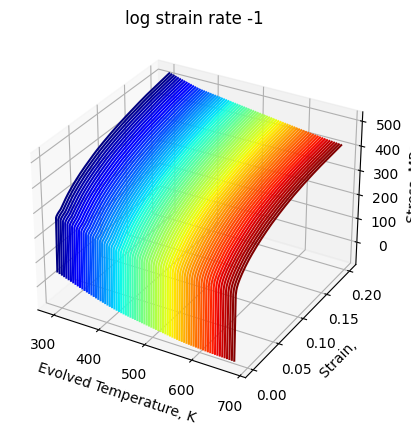

In [32]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = 77
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_1.items():
    # define x,y,z
    x = fc['temp_pred'].to_numpy()
    y = strain_range
    z = fc['stress_pred'].to_numpy()
    ax.plot(x,y,z,color=colors[i])
    i=i+1
    
ax.set_xlabel('Evolved Temperature, K')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Stress, MPa')
ax.set_title('log strain rate -1')

In [36]:
flows_1_keys = list(flows_1.keys())
flows_1_2d_keys = flows_1_keys[0::10]
flows_1_2d_keys

['-1.0_293',
 '-1.0_343',
 '-1.0_393',
 '-1.0_443',
 '-1.0_493',
 '-1.0_543',
 '-1.0_593',
 '-1.0_643']

In [37]:
flows_1_2d = {}
for i in range(8):
    key = flows_1_2d_keys[i]
    flows_1_2d[key] = flows_1[key]

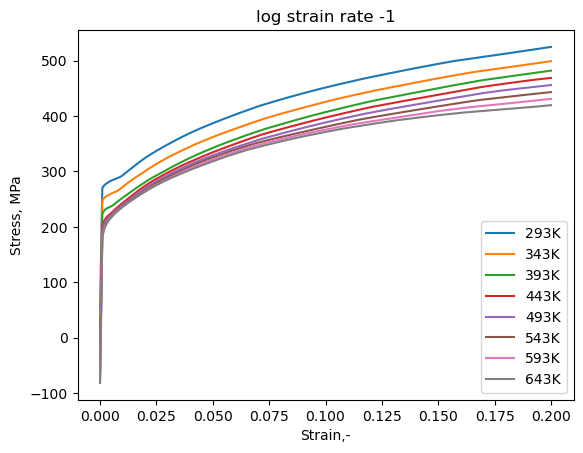

In [38]:
for key, fc in flows_1_2d.items():
    i_t = manual_descaling(fc['i_temp'][0], temp_range)
    plt.plot(strain_range, fc['stress_pred'], label=str(int(i_t))+'K')
plt.xlabel('Strain,-')
plt.ylabel('Stress, MPa')
plt.title('log strain rate -1')
plt.legend()

Text(0.5, 0.92, 'log strain rate -2')

<Figure size 640x480 with 0 Axes>

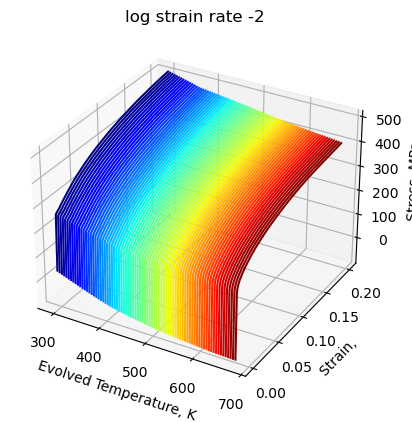

In [39]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = 77
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_2.items():
    # define x,y,z
    x = fc['temp_pred'].to_numpy()
    y = strain_range
    z = fc['stress_pred'].to_numpy()
    ax.plot(x,y,z,color=colors[i])
    i=i+1
    
ax.set_xlabel('Evolved Temperature, K')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Stress, MPa')
ax.set_title('log strain rate -2')

Text(0.5, 0.92, 'log strain rate -3')

<Figure size 640x480 with 0 Axes>

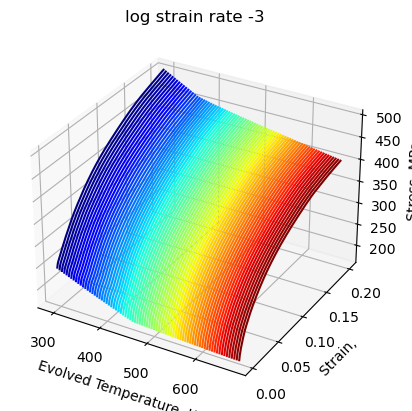

In [40]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = 77
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_3.items():
    # define x,y,z
    x = fc['temp_pred'].to_numpy()
    y = strain_range
    z = fc['stress_pred'].to_numpy()
    ax.plot(x[1:],y[1:],z[1:],color=colors[i])
    i=i+1
    
ax.set_xlabel('Evolved Temperature, K')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Stress, MPa')
ax.set_title('log strain rate -3')

Text(0.5, 0.92, 'log strain rate -4')

<Figure size 640x480 with 0 Axes>

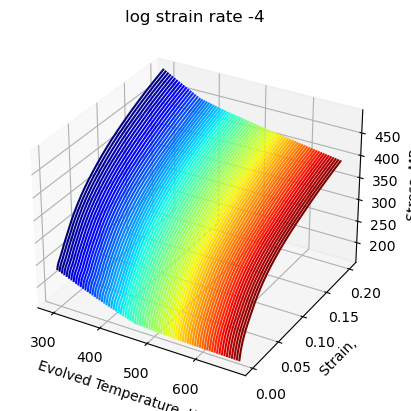

In [41]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = 77
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_4.items():
    # define x,y,z
    x = fc['temp_pred'].to_numpy()
    y = strain_range
    z = fc['stress_pred'].to_numpy()
    ax.plot(x[1:],y[1:],z[1:],color=colors[i])
    i=i+1
    
ax.set_xlabel('Evolved Temperature, K')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Stress, MPa')
ax.set_title('log strain rate -4')

In [42]:
## Temp vs strain, strain rate

In [33]:
flows_1a = {}
flows_2a = {}
flows_3a = {}
flows_4a = {}
flows_5a = {}
temp1 = manual_scaling(293, temp_range)
temp2 = manual_scaling(373, temp_range)
temp3 = manual_scaling(473, temp_range)
temp4 = manual_scaling(573, temp_range)
temp5 = manual_scaling(673, temp_range)

for key, fc in flows_interpolation.items():
    if(fc['i_temp'][0]== temp1):
        flows_1a[key] = fc
    elif(fc['i_temp'][0] == temp2):
        flows_2a[key] = fc
    elif(fc['i_temp'][0] == temp3):
        flows_3a[key] = fc
    elif(fc['i_temp'][0] == temp4):
        flows_4a[key] = fc
    elif(fc['i_temp'][0] == temp5):
        flows_5a[key] = fc

Text(0.5, 0.92, 'Initial temperature 293 K')

<Figure size 640x480 with 0 Axes>

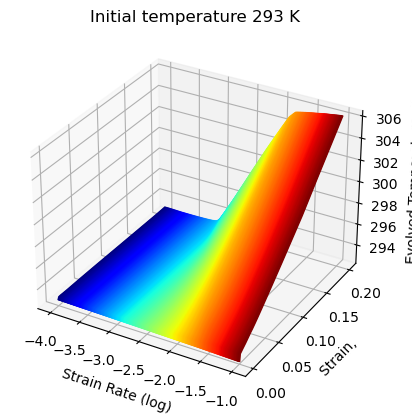

In [44]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = len(flows_1a)
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_1a.items():
    # define x,y,z
    x = manual_descaling(fc['log_rate'], log_rate_range)
    y = strain_range
    z = fc['temp_pred'].to_numpy()
    ax.plot(x, y, z, color=colors[i])
    i=i+1
    
ax.set_xlabel('Strain Rate (log)')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Evolved Temperature, K')
ax.set_title('Initial temperature 293 K')

Text(0.5, 0.92, 'Initial temperature 373 K')

<Figure size 640x480 with 0 Axes>

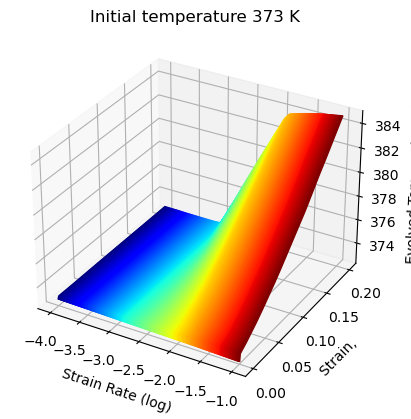

In [45]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = len(flows_2a)
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_2a.items():
    # define x,y,z
    x = manual_descaling(fc['log_rate'], log_rate_range)
    y = strain_range
    z = fc['temp_pred'].to_numpy()
    ax.plot(x, y, z, color=colors[i])
    i=i+1
    
ax.set_xlabel('Strain Rate (log)')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Evolved Temperature, K')
ax.set_title('Initial temperature 373 K')

Text(0.5, 1.0, '373 K')

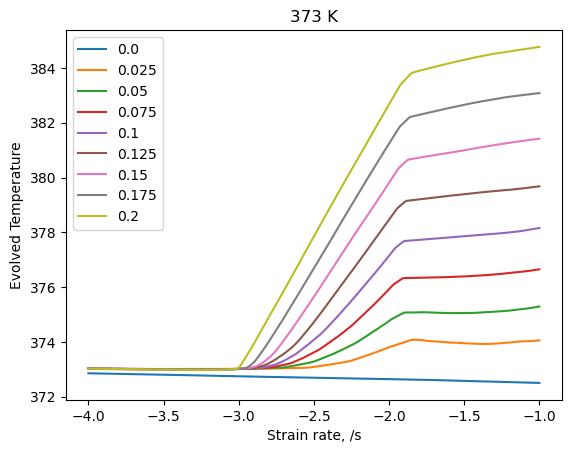

In [46]:
for i in range(0, 200+25, 25):
    strain_rate_x = []
    temp_y = []
    for key, fc in flows_2a.items():
        strain_rate_x.append(manual_descaling(fc['log_rate'][200], log_rate_range))
        temp_y.append(fc['temp_pred'][i])
    plt.plot(strain_rate_x, temp_y, label=str(round(strain_range[i],4)))
plt.xlabel('Strain rate, /s')
plt.ylabel('Evolved Temperature')
plt.legend()
plt.title('373 K')

Text(0.5, 1.0, '0.2 strain')

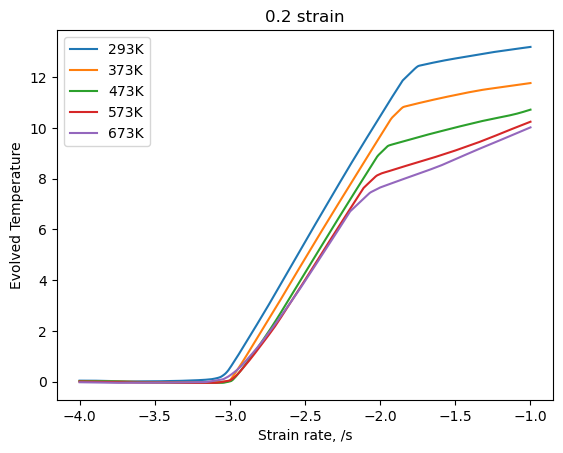

In [47]:
strain_rate_x = []
temp_y = []
for key, fc in flows_1a.items():
    strain_rate_x.append(manual_descaling(fc['log_rate'][200], log_rate_range))
    temp_y.append(fc['temp_pred'][i]-293)
plt.plot(strain_rate_x, temp_y, label='293K')

strain_rate_x = []
temp_y = []
for key, fc in flows_2a.items():
    strain_rate_x.append(manual_descaling(fc['log_rate'][200], log_rate_range))
    temp_y.append(fc['temp_pred'][i]-373)
plt.plot(strain_rate_x, temp_y, label='373K')

strain_rate_x = []
temp_y = []
for key, fc in flows_3a.items():
    strain_rate_x.append(manual_descaling(fc['log_rate'][200], log_rate_range))
    temp_y.append(fc['temp_pred'][i]-473)
plt.plot(strain_rate_x, temp_y, label='473K')

strain_rate_x = []
temp_y = []
for key, fc in flows_4a.items():
    strain_rate_x.append(manual_descaling(fc['log_rate'][200], log_rate_range))
    temp_y.append(fc['temp_pred'][i]-573)
plt.plot(strain_rate_x, temp_y, label='573K')

strain_rate_x = []
temp_y = []
for key, fc in flows_5a.items():
    strain_rate_x.append(manual_descaling(fc['log_rate'][200], log_rate_range))
    temp_y.append(fc['temp_pred'][i]-673)
plt.plot(strain_rate_x, temp_y, label='673K')


plt.xlabel('Strain rate, /s')
plt.ylabel('Evolved Temperature')
plt.legend()
plt.title('0.2 strain')


Text(0.5, 0.92, 'Initial temperature 473 K')

<Figure size 640x480 with 0 Axes>

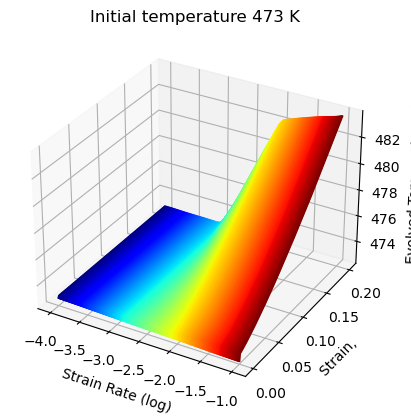

In [173]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = len(flows_3a)
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_3a.items():
    # define x,y,z
    x = manual_descaling(fc['log_rate'], log_rate_range)
    y = strain_range
    z = fc['temp_pred'].to_numpy()
    ax.plot(x, y, z, color=colors[i])
    i=i+1
    
ax.set_xlabel('Strain Rate (log)')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Evolved Temperature, K')
ax.set_title('Initial temperature 473 K')

Text(0.5, 0.92, 'Initial temperature 573 K')

<Figure size 640x480 with 0 Axes>

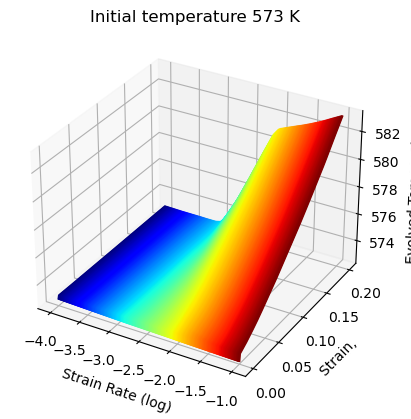

In [174]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = len(flows_4a)
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_4a.items():
    # define x,y,z
    x = manual_descaling(fc['log_rate'], log_rate_range)
    y = strain_range
    z = fc['temp_pred'].to_numpy()
    ax.plot(x, y, z, color=colors[i])
    i=i+1
    
ax.set_xlabel('Strain Rate (log)')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Evolved Temperature, K')
ax.set_title('Initial temperature 573 K')

Text(0.5, 0.92, 'Initial temperature 673 K')

<Figure size 640x480 with 0 Axes>

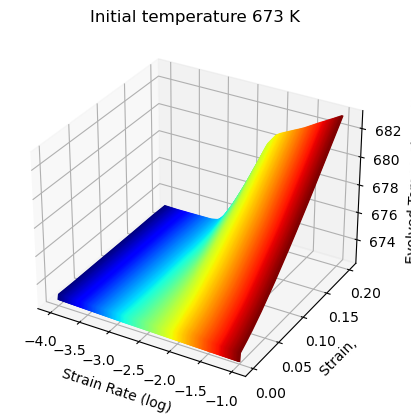

In [175]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
n = len(flows_5a)
colors = plt.cm.jet(np.linspace(0,1,n))
i=0
for key, fc in flows_5a.items():
    # define x,y,z
    x = manual_descaling(fc['log_rate'], log_rate_range)
    y = strain_range
    z = fc['temp_pred'].to_numpy()
    ax.plot(x, y, z, color=colors[i])
    i=i+1
    
ax.set_xlabel('Strain Rate (log)')
ax.set_ylabel('Strain, ')
ax.set_zlabel('Evolved Temperature, K')
ax.set_title('Initial temperature 673 K')

### Beta plot

In [48]:
# Trial- e2_373K

In [53]:
len(np.array(df_e2_373K['Strain']))

1997

In [54]:
X = np.array(df_e4['Strain'])
Y = np.array(df_e4['Stress'])

dx = 0.0001
L = len(X)

#beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
#beta = 0.45
rho = 7.87 * 1000
cp = 466
#coeff = beta / (rho*cp)
total_area = 0
delT = np.array(df_e4['delT'])
beta = []

for i in range(L-1):
    area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
    total_area = total_area + area
    coeff = delT[i] / total_area
    beta.append(coeff*rho*cp)

In [48]:
beta_var1 = []
rate_var = []
log_rate_var = []
for key, fc in flows_2a.items():
    X = strain_range[1:]
    Y = np.array(fc['stress_pred'][1:])
    dx = 0.001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['temp_pred']-373)
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_var1.append(beta[L-2])
    rate_var.append(10**(manual_descaling(fc['log_rate'].iloc[0], log_rate_range)))
    log_rate_var.append(manual_descaling(fc['log_rate'].iloc[0], log_rate_range))
    

In [42]:
beta_var2 = []
rate_var = []
log_rate_var = []
for key, fc in flows_3a.items():
    X = strain_range[1:]
    Y = np.array(fc['stress_pred'][1:])
    dx = 0.001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['temp_pred']-473)
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_var2.append(beta[L-2])
    rate_var.append(10**(manual_descaling(fc['log_rate'].iloc[0], log_rate_range)))
    log_rate_var.append(manual_descaling(fc['log_rate'].iloc[0], log_rate_range))
    

In [47]:
beta_var = []
rate_var = []
log_rate_var = []
for key, fc in flows_1a.items():
    X = strain_range[1:]
    Y = np.array(fc['stress_pred'][1:])
    dx = 0.001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['temp_pred']-293)
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_var.append(beta[L-2])
    rate_var.append(10**(manual_descaling(fc['log_rate'].iloc[0], log_rate_range)))
    log_rate_var.append(manual_descaling(fc['log_rate'].iloc[0], log_rate_range))
    

In [43]:
beta_var3 = []
rate_var = []
log_rate_var = []
for key, fc in flows_4a.items():
    X = strain_range[1:]
    Y = np.array(fc['stress_pred'][1:])
    dx = 0.001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['temp_pred']-573)
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_var3.append(beta[L-2])
    rate_var.append(10**(manual_descaling(fc['log_rate'].iloc[0], log_rate_range)))
    log_rate_var.append(manual_descaling(fc['log_rate'].iloc[0], log_rate_range))
    

In [44]:
beta_var4 = []
rate_var = []
log_rate_var = []
for key, fc in flows_5a.items():
    X = strain_range[1:]
    Y = np.array(fc['stress_pred'][1:])
    dx = 0.001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['temp_pred']-673)
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_var4.append(beta[L-2])
    rate_var.append(10**(manual_descaling(fc['log_rate'].iloc[0], log_rate_range)))
    log_rate_var.append(manual_descaling(fc['log_rate'].iloc[0], log_rate_range))

Text(0, 0.5, 'Beta')

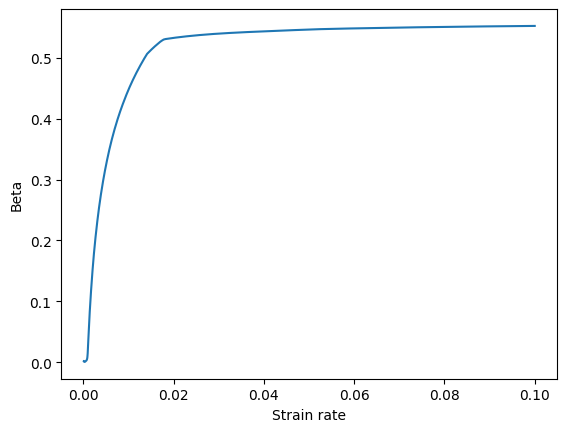

In [59]:
plt.plot(rate_var, beta_var)
plt.xlabel('Strain rate')
plt.ylabel('Beta')

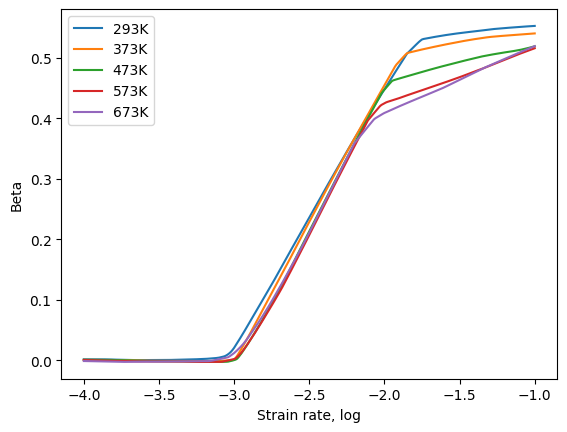

In [46]:
plt.plot(log_rate_var, beta_var, label='293K')
plt.plot(log_rate_var, beta_var1, label='373K')
plt.plot(log_rate_var, beta_var2, label='473K')
plt.plot(log_rate_var, beta_var3, label='573K')
plt.plot(log_rate_var, beta_var4, label='673K')
plt.xlabel('Strain rate, log')
plt.ylabel('Beta')
plt.legend()

In [50]:
beta_ana = []
rate_ana = []
log_rate_ana = []
for key, fc in beta_flows.items():
    X = np.array(fc['Strain'])
    Y = np.array(fc['Stress'])

    dx = 0.0001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['delT'])
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_ana.append(beta[L-2])
    rate_ana.append(fc['Rate'].iloc[0])
    log_rate_ana.append(np.log10(fc['Rate'].iloc[0]))

In [51]:
beta_ana1 = []
rate_ana = []
log_rate_ana = []
for key, fc in beta_flows1.items():
    X = np.array(fc['Strain'])
    Y = np.array(fc['Stress'])

    dx = 0.0001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['delT'])
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_ana1.append(beta[L-2])
    rate_ana.append(fc['Rate'].iloc[0])
    log_rate_ana.append(np.log10(fc['Rate'].iloc[0]))

In [54]:
beta_ana2 = []
rate_ana = []
log_rate_ana = []
for key, fc in beta_flows2.items():
    X = np.array(fc['Strain'])
    Y = np.array(fc['Stress'])

    dx = 0.0001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['delT'])
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_ana2.append(beta[L-2])
    rate_ana.append(fc['Rate'].iloc[0])
    log_rate_ana.append(np.log10(fc['Rate'].iloc[0]))

In [55]:
beta_ana3 = []
rate_ana = []
log_rate_ana = []
for key, fc in beta_flows3.items():
    X = np.array(fc['Strain'])
    Y = np.array(fc['Stress'])

    dx = 0.0001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['delT'])
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_ana3.append(beta[L-2])
    rate_ana.append(fc['Rate'].iloc[0])
    log_rate_ana.append(np.log10(fc['Rate'].iloc[0]))

In [56]:
beta_ana4 = []
rate_ana = []
log_rate_ana = []
for key, fc in beta_flows4.items():
    X = np.array(fc['Strain'])
    Y = np.array(fc['Stress'])

    dx = 0.0001
    L = len(X)

    #beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.01/0.02973)))
    #beta = 0.45
    rho = 7.87 * 1000
    cp = 466
    #coeff = beta / (rho*cp)
    total_area = 0
    delT = np.array(fc['delT'])
    beta = []

    for i in range(L-1):
        area = (0.5 * dx * (Y[i]+Y[i+1]) * 1e6)
        total_area = total_area + area
        coeff = delT[i] / total_area
        beta.append(coeff*rho*cp)
    
    beta_ana4.append(beta[L-2])
    rate_ana.append(fc['Rate'].iloc[0])
    log_rate_ana.append(np.log10(fc['Rate'].iloc[0]))

Text(0, 0.5, 'Beta')

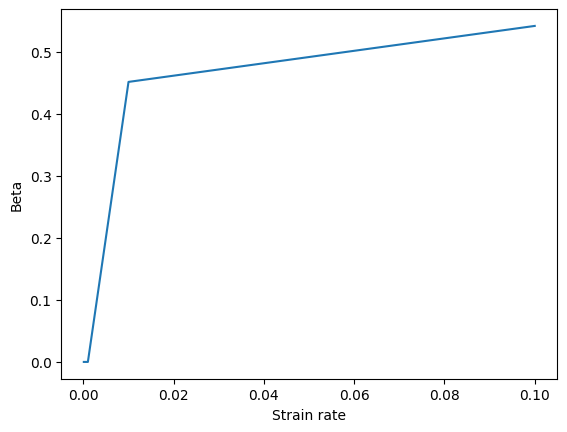

In [75]:
plt.plot(rate_ana, beta_ana)
plt.xlabel('Strain rate')
plt.ylabel('Beta')

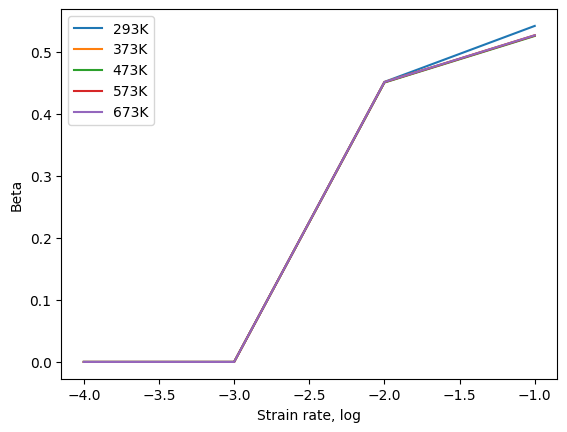

In [65]:
plt.plot(log_rate_ana, beta_ana, label='293K')
plt.plot(log_rate_ana, beta_ana1, label='373K')
plt.plot(log_rate_ana, beta_ana2, label='473K')
plt.plot(log_rate_ana, beta_ana3, label='573K')
plt.plot(log_rate_ana, beta_ana4, label='673K')
plt.xlabel('Strain rate, log')
plt.ylabel('Beta')
plt.legend()

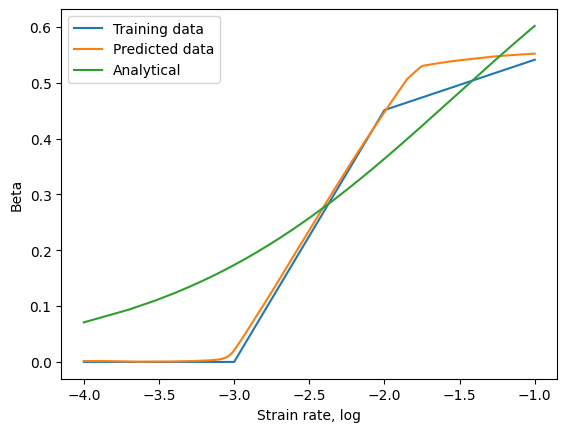

In [84]:
plt.plot(log_rate_ana, beta_ana, label='Training data')
plt.plot(log_rate_var, beta_var, label='Predicted data')
plt.plot(logs, betas, label='Analytical')

plt.xlabel('Strain rate, log')
plt.ylabel('Beta')
plt.legend()

In [79]:
0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(0.1/0.02973)))

0.6021587849328378

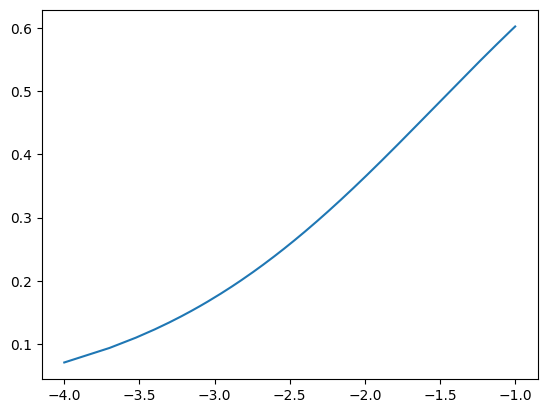

In [81]:
rates=np.arange(0.0001, 0.1, 0.0001)
betas = []
logs = []
for rate in rates:
    beta = 0.954 * 0.5 * (1 + math.tanh(0.51*math.log10(rate/0.02973)))
    betas.append(beta)
    logs.append(math.log10(rate))

plt.plot(logs, betas)